# Sync Test

In [153]:
from training import Training
training = Training(env_name='CartPole-v1', num_envs=10, num_steps=50)
# training = Training(env_name='LaserHockey-v0', num_envs=10, num_steps=50)
training.run()

# Bandit Test

### bandit.py

In [28]:
from bandit import Bandit

bandit = Bandit(mode='argmax', l=0, r=1, acc=10, acc2=2, width=2, lr=0.1, d=2)
# bandit.update(x=0.5, g=1)
candidates = bandit.sample()

print("Candidates:", candidates)

Candidates: [0.8 1. ]


In [8]:
from configs import configs

print(configs["CartPole-v1"])

{'replay': 2, 'num_envs': 2, 'batch_size': 64, 'sequence_length': 5, 'bootstrap_length': 5, 'discount': 0.997, 'v_loss_scaling': 1.0, 'q_loss_scaling': 10.0, 'pi_loss_scaling': 10.0, 'importance_sampling_clip_c': 1.05, 'importance_sampling_clip_rho': 1.05, 'optimizer': 'Adam Weight Decay', 'weight_decay_rate': 0.01, 'learning_rate': 0.0005, 'warmup_steps': 4000, 'adamw_beta1': 0.9, 'adamw_beta2': 0.98, 'adamw_epsilon': 1e-06, 'adamw_clip_norm': 50.0, 'learner_push_model_every_n_steps': 25, 'actor_pull_model_every_n_steps': 64, 'architecture_params': {'architecture': 'dense', 'input_dim': 4, 'hidden_dim': 128, 'action_dim': 2}, 'bandit_params': {'mode': ['argmax', 'random'], 'tau1': [0.0, 50.0], 'tau2': [0.0, 50.0], 'epsilon': [0.0, 1.0], 'acc': [50, 50, 10], 'acc2': [2, 3, 4], 'width': [2, 3, 4], 'lr': [0.05, 0.1, 0.2], 'd': 3}}


In [12]:
from configs import configs
# from bandit import initialize_bandits
# from bandit import update_bandits
# from bandit import get_candidates
# from bandit import sample_candidate
# from bandit import get_all_indeces

env_name = "CartPole-v1"
config = configs[env_name]

# bandits = initialize_bandits(params["bandit_params"])

In [100]:
update_bandits(bandits, 22.666666666666664, 9.666666666666666, 0.8500000000000001, 0.5)

In [102]:
bandits[27]['tau1'].sample()

array([22.5, 22. , 21.5])

In [103]:
all_candidates = get_candidates(bandits)
sampled_candidate = sample_candidate(all_candidates)
print(sampled_candidate)

(23.0, 10.0, 0.8500000000000001)


In [106]:
get_all_indeces(5, bandits)

array([[ 3.75      , 45.75      ,  0.33333333],
       [33.66666667, 31.25      ,  0.375     ],
       [ 1.5       , 41.        ,  0.95      ],
       [ 4.75      , 42.5       ,  0.95      ],
       [24.66666667, 14.66666667,  0.        ]])

In [1]:
from bandit import Bandits

In [13]:
bandits = Bandits(configs[env_name])

In [15]:
bandits.bandits

[{'tau1': <bandit.Bandit at 0x218b375dc10>,
  'tau2': <bandit.Bandit at 0x218b309d150>,
  'epsilon': <bandit.Bandit at 0x218b309d550>},
 {'tau1': <bandit.Bandit at 0x218b30a0c90>,
  'tau2': <bandit.Bandit at 0x218b309b6d0>,
  'epsilon': <bandit.Bandit at 0x218b3902490>},
 {'tau1': <bandit.Bandit at 0x218b25caf10>,
  'tau2': <bandit.Bandit at 0x218b38799d0>,
  'epsilon': <bandit.Bandit at 0x218b3878950>},
 {'tau1': <bandit.Bandit at 0x218b3878c90>,
  'tau2': <bandit.Bandit at 0x218b3878e10>,
  'epsilon': <bandit.Bandit at 0x218b3906a90>},
 {'tau1': <bandit.Bandit at 0x218b3906dd0>,
  'tau2': <bandit.Bandit at 0x218b3906d90>,
  'epsilon': <bandit.Bandit at 0x218b3906f90>},
 {'tau1': <bandit.Bandit at 0x218b3907010>,
  'tau2': <bandit.Bandit at 0x218b3906ed0>,
  'epsilon': <bandit.Bandit at 0x218b3906e50>},
 {'tau1': <bandit.Bandit at 0x218b3906f50>,
  'tau2': <bandit.Bandit at 0x218b3905f50>,
  'epsilon': <bandit.Bandit at 0x218b3906f10>},
 {'tau1': <bandit.Bandit at 0x218b3904b90>,
  't

In [74]:
from training import Training
from bandit import Bandits

env_name = "CartPole-v1"
load_run = 'n256,bs64,s20,lr0.001_Oct25-14-41-00_lr'

training = Training(env_name, load_run)
bandits = Bandits(training)

for _ in range(10):
    tau1, tau2, epsilon, N1, N2, N3, w1, w2, w3 = bandits.get_index_data()

print(w2)

[19.94649637 15.46358392 21.50991816 20.25709766 19.51605495 19.51605495
 22.66315178 23.24710316 16.91162398 14.71507088 15.31964838 15.31964838
 18.59847827 17.31568576 14.6241195  16.45918334 13.13209398 13.13209398
 25.88071892 25.21599278 25.70920747 23.36889336 23.47066199 23.47066199
 18.94529304 18.26865134 16.15170272 20.65980133 20.81362316 20.81362316
 20.41275735 15.79461741 17.18501427 17.22754056 21.34632945 21.34632945
 16.25984785 12.20951154 13.08628811 11.84880531 12.41127719 12.41127719
  9.63830041 13.51113222 14.18757834 14.21127009 15.48832161 15.48832161
 21.05671936 24.54785539 23.40606671 23.6108396  22.41958293 22.41958293
 23.15005757 26.27367361 22.71289662 24.00317147 21.13165015 21.13165015
 20.96536523 20.5890816  18.66110416 18.96494051 17.29897304 17.29897304
 18.81457097 18.14522457 16.64417293 17.11289256 14.51628562 14.51628562
 20.56442399 23.27469299 22.32355691 21.15269114 16.66542183 16.66542183
 16.92819405 15.43389478 15.04299635 19.315435   21

### bandit_jax.py

In [1]:
from training import Training
from bandit_jax import Bandits2
env_name = "CartPole-v1"

train_parameters = {'metrics': False}
run_name_dict = {'prefix': 's5', 'suffix': 'bandit_jax', 'timestamp': False}

training = Training(env_name, train_parameters, run_name_dict)
bandits2 = Bandits2(training)

In [2]:
bandits2.param_indeces_and_search_spaces

(Array([[ 0,  3,  6,  9, 12, 15]], dtype=int32),
 Array([[ 1,  4,  7, 10, 13, 16]], dtype=int32),
 Array([[ 2,  5,  8, 11, 14, 17]], dtype=int32),
 Array([ 0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,  1.75,  2.  ,
         2.25,  2.5 ,  2.75,  3.  ,  3.25,  3.5 ,  3.75,  4.  ,  4.25,
         4.5 ,  4.75,  5.  ,  5.25,  5.5 ,  5.75,  6.  ,  6.25,  6.5 ,
         6.75,  7.  ,  7.25,  7.5 ,  7.75,  8.  ,  8.25,  8.5 ,  8.75,
         9.  ,  9.25,  9.5 ,  9.75, 10.  , 10.25, 10.5 , 10.75, 11.  ,
        11.25, 11.5 , 11.75, 12.  , 12.25, 12.5 , 12.75, 13.  , 13.25,
        13.5 , 13.75, 14.  , 14.25, 14.5 , 14.75, 15.  , 15.25, 15.5 ,
        15.75, 16.  , 16.25, 16.5 , 16.75, 17.  , 17.25, 17.5 , 17.75,
        18.  , 18.25, 18.5 , 18.75, 19.  , 19.25, 19.5 , 19.75, 20.  ,
        20.25, 20.5 , 20.75, 21.  , 21.25, 21.5 , 21.75, 22.  , 22.25,
        22.5 , 22.75, 23.  , 23.25, 23.5 , 23.75, 24.  , 24.25, 24.5 ,
        24.75, 25.  , 25.25, 25.5 , 25.75, 26.  , 26.25, 26.5 , 26.75,
 

In [41]:
tau1_indeces, tau2_indeces, epsilon_indeces, tau1_search_space, tau2_search_space, epsilon_search_space = bandits2.param_indeces_and_search_spaces

In [42]:
tau1_indeces

Array([[ 0,  3,  6,  9, 12, 15]], dtype=int32)

In [49]:
jnp.sum(bandits2.ws[tau1_indeces][0], axis=0).shape

(201,)

In [39]:
import jax.numpy as jnp

jnp.argmax(bandits2.ws[0])
bandits2.param_indeces_and_search_spaces[4][jnp.argmax(bandits2.ws[0])]

Array(46.5, dtype=float32)

In [30]:
import time
import random

tau1 = random.uniform(0, 50)
tau2 = random.uniform(0, 50)
epsilon = random.uniform(0, 1)
g = random.uniform(-10, 10)

start_time = time.time()
bandits2.update_bandits(tau1, tau2, epsilon, g)
end_time = time.time()

execution_time = end_time - start_time
print("Execution time:", execution_time, "seconds")

Execution time: 0.0030794143676757812 seconds


In [10]:
start_time = time.time()
candidates = bandits2.get_candidates()
execution_time = time.time() - start_time
print("Execution time:", execution_time, "seconds")
print(candidates)

Execution time: 0.0027565956115722656 seconds
{'tau1': [8.040201, 8.542714, 8.291457, 8.040201, 8.542714, 8.291457, 8.040201, 8.542714, 8.291457, 8.291457, 9.045226, 17.336683, 12.311558, 18.844221, 6.78392, 13.065327, 7.7889447, 5.7788944], 'tau2': [9.296483, 9.798995, 9.547739, 9.296483, 9.798995, 9.547739, 9.296483, 9.798995, 9.547739, 3.5175881, 43.21608, 26.884422, 29.648241, 42.964825, 33.16583, 23.618092, 48.74372, 6.5326633], 'epsilon': [0.89447236, 0.9045226, 0.89949745, 0.89447236, 0.9045226, 0.89949745, 0.89447236, 0.9045226, 0.89949745, 0.86934674, 0.4120603, 0.63316584, 0.6683417, 0.07537688, 0.75376886, 0.8090452, 0.69849247, 0.06532663]}


### bandit_jax_new.py

In [1]:
import jax.numpy as jnp
from training import Training
from bandit_jax_new import Bandits
env_name = 'CartPole-v1'

train_parameters = {'metrics': False,
                    'jax_seed': 69}
run_name_dict = {'prefix': 's5', 'suffix': 'bandit_jax_new', 'timestamp': False}

training = Training(env_name, train_parameters, run_name_dict)
bandits = Bandits(training)

In [6]:
import time

train_indeces = [[2, 13, 0.5], [8, 27, 0.2], [42, 7, 0.8]]
train_returns = [3., 27., 13.]
train_envs = [0, 2, 5]

start_time = time.time()
bandits.update_bandits(train_indeces, train_returns, train_envs)
execution_time = time.time() - start_time
print("Execution time:", execution_time, "seconds")

print(bandits.ws[0, 91:94])
print(bandits.ws[3, 127:130])
print(bandits.search_spaces[0, 91:94])
print(bandits.search_spaces[3, 127:130])

Execution time: 0.003959178924560547 seconds
[0.      2.01696 0.     ]
[0.         0.67865723 0.        ]
[1.0527275 1.0789397 1.1051518]
[1.0299908 1.0693091 1.1086273]


In [19]:
import time

start_time = time.time()
candidates = bandits.get_all_candidates()
execution_time = time.time() - start_time
print("Execution time:", execution_time, "seconds")

print(candidates.shape)
print(candidates)

Execution time: 0.002179861068725586 seconds
(3360, 3)
[[1.0848196  2.9569108  2.709099  ]
 [3.9042356  3.9302347  2.6350896 ]
 [0.9494828  0.9965349  0.52090806]
 ...
 [3.8796322  3.904807   3.9152915 ]
 [2.1093042  0.3887061  3.7300105 ]
 [0.37178522 0.3304568  0.7079835 ]]


In [78]:
import time

candidates = bandits.get_all_candidates()
start_time = time.time()
sampled_candidates = bandits.sample_all_candidates([0, 2, 5])
execution_time = time.time() - start_time
print("Execution time:", execution_time, "seconds")

print(sampled_candidates.shape)
print(sampled_candidates)

Execution time: 0.0056650638580322266 seconds
(3, 3)
[[37.386322   47.794323    0.09999934]
 [18.621323   49.371357    0.93797994]
 [11.433098    0.6114439   0.98218215]]


In [109]:
import time

start_time = time.time()
max_tau1, max_tau2, max_epsilon = bandits.get_index_data(only_index=True)
execution_time = time.time() - start_time
print("Execution time:", execution_time, "seconds")

print(max_tau1, max_tau2, max_epsilon)

Execution time: 0.003039836883544922 seconds
0.051153347 0.057498727 0.017963102


# Actor Test

In [4]:
from actor import Actor
from training import Training

env_name = "CartPole-v1"

train_parameters = {'max_frames': 100000000,
                    'lr_finder': False}

abbreviation_dict = {
                     'num_envs': 'n',
                     'batch_size': 'b',
                     'sequence_length': 's',
                     'bootstrap_length': 'bb',
                     'd_target': 'd_t',
                     'discount': 'g',
                     'learning_rate': 'lr',
                     'add_on': None}

training = Training(env_name, None, train_parameters, abbreviation_dict)
actor = Actor(training)


In [5]:
import numpy as np

a = np.float32(3.14)
b = np.float16(1.5)

result = a + b
print(result)


4.6400003


In [9]:
obs = [[1,2,3,4], [2,3,4,5]]
ind = [[1,1,0.4], [1,1,.6]]

In [10]:
v1, v2, a1, a2, policy = actor.calculate_policy(obs, ind)
v1, v2, a1, a2, policy

ValueError: not enough values to unpack (expected 5, got 2)

In [13]:
policy = actor.calculate_policy(obs, ind)
policy

tensor([[0.5123, 0.4877],
        [0.5084, 0.4916]], device='cuda:0')

In [17]:
action, action_prob = actor.get_actions(obs, ind, stochastic=True)
action, action_prob

(array([0, 1]),
 array([[0.51229334],
        [0.4915942 ]], dtype=float32))

# Show Test

In [8]:
import torch
import gymnasium as gym
import laser_hockey_env as lh
from actor import Actor
from configs import configs

# env_name = "Acrobot-v1"
# env_name = "LunarLander-v2"
env_name = "LaserHockey-v0"
config = configs[env_name]
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

if env_name == "LaserHockey-v0":
    env = lh.LaserHockeyEnv(mode=2)
else:
    env = gym.make(env_name, render_mode="human")
observation, info = env.reset()
# actor = Actor(config['architecture_params'], device)

total_reward = 0
for _ in range(100):
    if env_name == "LaserHockey-v0":
        env.render()
    # actions = [self.env.single_action_space.sample() for _ in range(self.num_envs)]
    action = env.action_space.sample()
    # dummy_indeces = [[1,1,1]]
    # v1, v2, a1, a2, policy = actor.calculate_values(observation, dummy_indeces)
    # action, action_probs = actor.get_action(policy, stochastic=True)
    observation, reward, terminated, truncated, info = env.step(action)
    total_reward += reward
    print(info)

    if terminated or truncated:
        # print(total_reward)
        observation, info = env.reset()

env.close()

{'winner': 0, 'reward_closeness_to_puck': 0, 'reward_touch_puck': 0.0, 'reward_puck_direction': -0.011503320693969726, 'obs_agent_two': array([-2.00716019e-01, -5.81110287e-01,  5.34061059e-04,  2.70402998e-02,
       -5.39059103e-02,  6.71120882e-03,  8.00059827e-01, -1.73435211e-03,
       -2.03797678e-04,  2.69243345e-03, -5.24826288e-02, -2.56099701e-03,
       -1.76159032e-01,  7.55341196e-01,  5.75166035e-01, -1.52343869e-01])}
{'winner': 0, 'reward_closeness_to_puck': 0, 'reward_touch_puck': 0.0, 'reward_puck_direction': -0.011493734359741211, 'obs_agent_two': array([-2.00539907e-01, -5.81572056e-01,  1.44996141e-03,  7.93347433e-03,
       -1.58772647e-02,  1.15095437e-02,  7.99379985e-01, -4.36077118e-03,
       -1.95364829e-04, -3.05946261e-02, -7.87739217e-02,  1.05970353e-04,
       -1.50617345e-01,  7.45193386e-01,  5.74686718e-01, -1.52216911e-01])}
{'winner': 0, 'reward_closeness_to_puck': 0, 'reward_touch_puck': 0.0, 'reward_puck_direction': -0.011484156608581543, 'obs_

# Tensorboard Test

In [76]:
from configs import configs
from actor import Actor

env_name = "CartPole-v1"
config = configs[env_name]
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
actor = Actor(config['architecture_params'], device)
model = actor.actor1

from torch.utils.tensorboard import SummaryWriter
import datetime
import json
import os

# Define hyperparameters
hyperparams = {
    'learning_rate': 2e-3,
    'batch_size': 64,
    'num_epochs': 100
}

# Get current timestamp
timestamp = datetime.datetime.now().strftime("%b%d-%H-%M-%S")

# Create a more descriptive name for the run
run_name = f"lr{hyperparams['learning_rate']},bs{hyperparams['batch_size']},s{hyperparams['num_epochs']}_{timestamp}"

# Create a SummaryWriter with a custom log directory and run name
log_dir = f"runs/{run_name}"
writer = SummaryWriter(log_dir=log_dir)

# Save hyperparameters as a separate file
hyperparams_file = os.path.join(log_dir, 'hyperparameters.json')
with open(hyperparams_file, 'w') as f:
    json.dump(hyperparams, f)

# Log images, histograms, and dummy metrics in a loop
for i in range(20):
    actor = Actor(config['architecture_params'], device)

    # Update dummy metrics
    metrics = {
        'accuracy/agent1': 0.45 + i * 0.01,
        'accuracy/agent2': 0.35 + i * 0.02,
        'loss/train': 0.30 - i * 0.01,
        'loss/val': 0.40 - i * 0.02
    }

    # Log histograms
    for name, param in actor.actor1.named_parameters():
        writer.add_histogram(name, param, global_step=i)

    # Log dummy metrics
    for metric_name, metric_value in metrics.items():
        writer.add_scalar(metric_name, metric_value, global_step=i)

# Close the SummaryWriter
writer.flush()
writer.close()

# Value Scaling Test

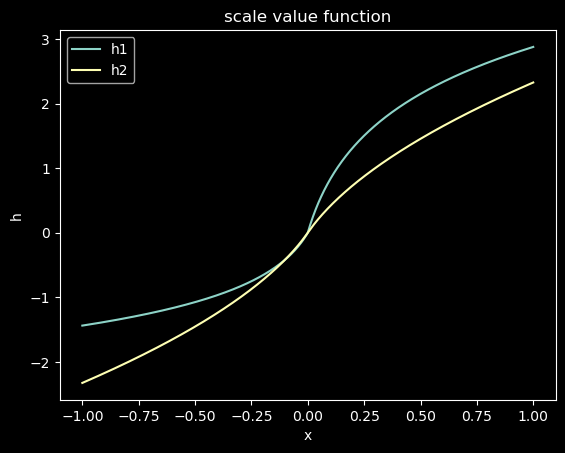

In [5]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background')

y_scale1 = 0.6
y_scale2 = 1.0
x_scale = 10
# y_scale1 = 0.6
# y_scale2 = 1.2
# x_scale = 0.6

def scale_value1(x, x_scale, y_scale):
    x = x * x_scale
    x_log = np.log(np.abs(x) + 1.)
    x = np.where(np.sign(x) > 0, x_log * 2, x_log * -1)
    x = x * y_scale
    return x

def scale_value2(x, x_scale, y_scale):
    x = x * x_scale
    x = (np.sign(x) * ((np.abs(x) + 1.)**(1/2) - 1.) + 0.001 * x)
    x = x * y_scale
    return x

x = np.linspace(-1, 1, 1000)
h1 = scale_value1(x, x_scale, y_scale1)
h2 = scale_value2(x, x_scale, y_scale2)

plt.plot(x, h1, label='h1')
plt.plot(x, h2, label='h2')
plt.xlabel('x')
plt.ylabel('h')
plt.title('scale value function')
plt.legend()
plt.show()

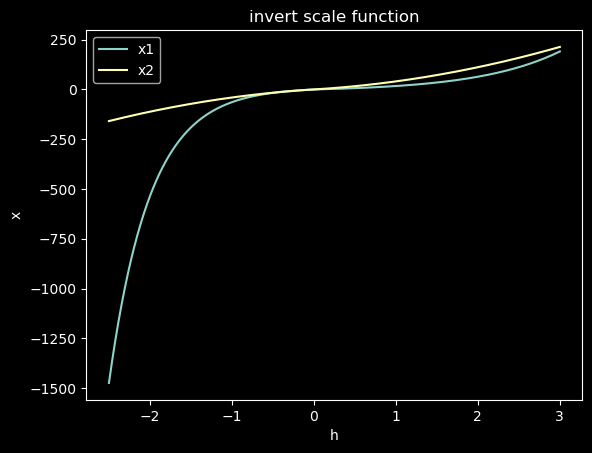

In [19]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background')

y_scale1 = 0.5
y_scale2 = 0.8
x_scale = 0.1

def invert_scale1(h, x_scale, y_scale):
    h = h / y_scale
    h_ = np.where(np.sign(h) > 0, np.abs(h) / 2, np.abs(h))
    h_ = np.sign(h) * (np.exp(h_) - 1)
    h_ = h_ / x_scale
    return h_

def invert_scale2(h, x_scale, y_scale):
    h = h / y_scale
    h = np.sign(h) * ((((1 + 4*0.001*(np.abs(h) + 1 + 0.001))**(1/2) - 1) / (2*0.001))**2 - 1)
    h = h / x_scale
    return h

hh = np.linspace(-2.5, 3., 1000)
x1 = invert_scale1(hh, x_scale, y_scale1)
x2 = invert_scale2(hh, x_scale, y_scale2)

plt.plot(hh, x1, label='x1')
plt.plot(hh, x2, label='x2')
plt.xlabel('h')
plt.ylabel('x')
plt.title('invert scale function')
plt.legend()
plt.show()

In [43]:
y_scale1 = 1.0
y_scale2 = 2.5
x_scale = 0.02

x = np.linspace(-600, 300, 41)
h1 = scale_value1(x, x_scale, y_scale1)
h2 = scale_value2(x, x_scale, y_scale2)
x1 = invert_scale1(h1, x_scale, y_scale1)
x2 = invert_scale2(h2, x_scale, y_scale2)

print(x, x)

[-600.  -577.5 -555.  -532.5 -510.  -487.5 -465.  -442.5 -420.  -397.5
 -375.  -352.5 -330.  -307.5 -285.  -262.5 -240.  -217.5 -195.  -172.5
 -150.  -127.5 -105.   -82.5  -60.   -37.5  -15.     7.5   30.    52.5
   75.    97.5  120.   142.5  165.   187.5  210.   232.5  255.   277.5
  300. ] [-600.  -577.5 -555.  -532.5 -510.  -487.5 -465.  -442.5 -420.  -397.5
 -375.  -352.5 -330.  -307.5 -285.  -262.5 -240.  -217.5 -195.  -172.5
 -150.  -127.5 -105.   -82.5  -60.   -37.5  -15.     7.5   30.    52.5
   75.    97.5  120.   142.5  165.   187.5  210.   232.5  255.   277.5
  300. ]


# Training Test

In [3]:
import torch
from configs import configs
from actor import Actor
from learner import Learner
from bandit import Bandits
from training import Training
from data_collector import DataCollector
from metric import Metric

env_name = "CartPole-v1"
# env_name = "LunarLander-v2"
# env_name = "LaserHockey-v0"

test_parameters = {'num_envs': 32,
                   'batch_size': 32,
                   'sequence_length': 10,
                   'bootstrap_length': 3,
                   'learning_rate': 1e-4,
                   'd_push': 1,
                   'd_pull': 10}

config = {key: test_parameters[key] if key in test_parameters else value for key, value in configs[env_name].items()}
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

data_collector = DataCollector(config)
metric = Metric(config, env_name, test_parameters)
bandits = Bandits(config)
actor = Actor(config, metric, device)
learner = Learner(config, metric, device)
training = Training(config, env_name)

training.run(actor, learner, bandits, data_collector, metric)

AttributeError: 'dict' object has no attribute 'config'

# Show Actor Test

In [2]:
import numpy as np
from environments import Environments
# from bandit import Bandits
from bandit_jax_new import Bandits
# from actor import Actor
from actor_jax import Actor
from training import Training


# env_name = 'CartPole-v1'
# load_run = 'b16,s100,bb100,d_t10,d0.995,lr0.0001_Oct28-15-46-41'
# load_run = 'n512,b16,s100,bb100,d_t1000,g0.995,lr0.01_Nov24-09-14-55_no_bandit'

# env_name = 'LunarLander-v2'
# load_run = 'b32,s40,bb20,d0.997,lr5e-06_Oct27-10-14-55'
# load_run = 'b16,s100,bb100,d_t1000,d0.997,lr1e-05_Oct28-18-39-16'
# load_run = 'b16,s100,bb100,d_t1000,g0.997,lr0.0001_Oct29-12-31-56'
# load_run = 'b16,s100,bb100,d_t1000,g0.997,lr0.001_Oct29-14-11-12'
# load_run = 'S5,rng27,bs32,d1000,y11.0,y22.5,x0.02,pt4.0,v1.0,q1.0,p10.0'

# env_name = 'LaserHockey-v0'
# load_run = 'S5,rng27,bs256,d500,g0.98,y10.5,y20.7,x0.6,pt3.0,v1.0,q1.0,p10.0'
# load_run = 'dense,rng27,bs64,s10,b10,e0.995,g0.99,lr0.0001,y10.6,y21.2,x0.6,v1.0,q5.0,p5.0'

env_name = 'Crypto-v0'
# load_run = 'S5,rng27,bs64,s10,b10,e0.995,g0.99,y10.6,y21.0,x10.0,log_r,data - Copy(45M)'
# load_run = 'S5,rng27,bs64,s10,b10,e0.995,g0.99,y10.6,y21.0,x10.0,log_r,data - Copy(79M)'
# load_run = 'S5,rng27,bs64,s10,b10,e0.995,g0.99,y10.6,y21.0,x10.0,log_r,data - Copy(102M)'
# load_run = 'S5,rng27,bs64,s10,b10,e0.995,g0.99,y10.6,y21.0,x10.0,r4,1year - Copy(52M)'
# load_run = 'S5,rng27,bs64,s10,b10,e0.995,g0.99,y10.6,y21.0,x10.0,only_a - Copy(83M)'
load_run = 'S5,rng27,bs64,s10,b10,e0.995,g0.99,y10.6,y21.0,x10.0,only_a - Copy(111M)'

# load_run = None

train_parameters = {
    "load_run": load_run,
    "train_frames": 0}

episodes = 1
steps = 10000

training = Training(env_name, train_parameters, {})
environments = Environments(training, training=False, render_mode='human')
bandits = Bandits(training)
actor = Actor(training)
actor.pull_weights(training=False, target_eval=True)
index = bandits.get_index_data(only_index=True)
# index = (1, 1, 0)
# print(index)

for _ in range(episodes):
    observations, infos = environments.reset(random=True)
    # print(infos)
    returns = np.zeros(232)
    for step in range(steps):
        actions, action_probs = actor.get_actions(observations, np.expand_dims(index, axis=0), stochastic=False, training=False)
        # print(actions)
        observations, rewards, terminated, truncated, infos = environments.step(actions, infos)
        returns += rewards
        print(step + 1, end='\r')
        if np.all(terminated) or np.all(truncated):
            print(step + 1, returns)
            break
        if step + 1 == steps:
            print('Tie', returns)
# environments.close()

744 [ 1.04511163e+00  5.16151287e-01  7.75486153e-01  7.37497637e-01
  3.41559678e-01  8.79060869e-01  5.46928130e-01  9.12601693e-01
  1.64992841e+00  8.57021575e-01  8.73582775e-01  7.37443061e-01
  6.11602085e-01  1.05366105e+00  8.14552405e-01  6.50736133e-01
  1.05795707e+00  1.61074782e+00  1.30842520e+00  7.66582508e-01
  1.14573208e+00  1.33250292e+00  9.52086351e-01  3.43377070e+00
  1.00363674e+00  1.69711437e+00  7.51697810e-01  8.91386935e-01
  8.98908621e-01  1.76010547e+00  8.49461153e-01  1.18037207e+00
  1.46701922e+00  7.02451577e-01  1.08377459e+00  1.35660997e+00
  8.74664200e-01  1.42731053e+00  6.97563232e-01  2.16669530e+00
  5.05117416e-01  1.01613889e+00  1.07084052e+00  1.07625094e+00
  1.40120515e+00  1.14862143e+00  6.90705822e-01  2.34119204e+00
  1.91834030e+00  1.08764922e+00  2.87275508e+00  2.75149493e+00
  1.86986354e+00  6.20913498e-01  8.38956970e-01  3.44264564e+00
  1.97261135e+00  1.24883793e+00  7.79489008e-01  1.80863529e+00
  7.51840716e-01  1.7

In [3]:
for i in sorted(range(len(environments.envs.env_states)), key=lambda i: returns[i], reverse=True):
    print(environments.envs.env_states[i].symbol, returns[i])

SUNUSDT 10.865658217770617
GFTUSDT 10.302312616163709
ALPACAUSDT 8.079562600643136
HNTUSDT 6.9281840456367245
BSWUSDT 6.055587807610086
VGXUSDT 5.825048087285802
LQTYUSDT 4.983722327007716
SUIUSDT 4.510210631558915
AMBUSDT 4.415738155086959
SSVUSDT 4.2103938413540725
PEOPLEUSDT 4.096679273935837
LDOUSDT 3.9142041914286834
HOOKUSDT 3.8676196215049297
MAVUSDT 3.7951664243913363
TRBUSDT 3.707143209965351
HIFIUSDT 3.668912980144243
REEFUSDT 3.5215012100744527
10000LADYSUSDT 3.511794896894882
YGGUSDT 3.442645639199373
FTMUSDT 3.4337707013874708
CYBERUSDT 3.3829603810856845
TRUUSDT 3.30156232923977
LEVERUSDT 3.190653946488011
COMBOUSDT 3.1900797930013143
GMXUSDT 3.1587070654478397
IDEXUSDT 2.995509201614797
XVGUSDT 2.988377641740748
PENDLEUSDT 2.9754248647754435
ORDIUSDT 2.96701109569133
DUSKUSDT 2.9542850344106637
CHRUSDT 2.8727550770755723
1000PEPEUSDT 2.8402089736746383
CKBUSDT 2.8117452467902577
TUSDT 2.773893336888477
TLMUSDT 2.751494925974585
HOTUSDT 2.7382452679802065
RSS3USDT 2.69992

In [4]:
returns.mean() # fee = 0.005

1.8642813193252585

In [19]:
returns.mean() # fee = 0.005, only long

1.8330226537358225

In [16]:
returns.mean() # fee = 0.005, only short

1.6442331140327335

# Testing Random Stuff